# VAPOR Guide

In [ ]:
# Required Modules
%matplotlib inline

import core as cor
import support as sup
import plotter as plo

import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u, constants as c


# import some data
tB_FITS="./test_data/stereo/20230916_180745_B.fts"
pB_FITS="./test_data/stereo/20230916_180745_pB.fts"
FITS_file_list=[tB_FITS, pB_FITS]

The Velocity And POsition Reconstruction (VAPOR) mapping tool is designed to perform Line-of-Sight CME tracking in real time with white-light polarization measurements. It relies on scattering geometry of polarized light, and the methods behind this are outlined in https://arxiv.org/pdf/2511.00714. The distance to an object $l$ can be obtained by combining the projected elongation angle $\epsilon$ with measurements of total brightness $(tB)$ and excess polarized brightness $(pB)$, and their ratio $p = pB/tB$. The polarization ratio $(PR)$ can be expressed as a separable function of scattering angle and scattering function (see Billings, 1966; Inhester, 2015).

As the derivation has a built in degeneracy with two output solutions, one positive, the second negative, two solutions are always supplied to the end user, rather than including tracking software to conclude which is the unrealistic solution.


The VAPOR package is comprised of 5 main components:
 - core - which contains the functions used for calculating line of sight distances
 - polarization - a wrapper for the solpolpy package which makes polarization transformation
 - errors - derives error values for each pixel
 - support - these are support modules required by core
 - plotter - contains all plotting algorithms
 - convenience - extra functions for end user convenience, but not always required

To explain each package of functions a series of seperate docs have been generated and should be read in this order for a full understanding:
 - doc_01_overview.ipynb
 - doc_02_convenience.ipynb
 - doc_03_support.ipynb
 - doc_04_core.ipynb
 - doc_05_errors.ipynb
 - doc_06_plotter.ipynb

This document shows basic functionality to produce a plot

# Support

Support contains the following functions
- gauss_kern
- blur_image
- open_fits
- generate_square_test_pattern
- _read_fits_image
- import_data
- build_mask
- create_distance_map
- print_minmax

In [23]:
# import some data
tB_FITS="./test_data/stereo/20230916_180745_B.fts"
pB_FITS="./test_data/stereo/20230916_180745_pB.fts"
FITS_file_list=[tB_FITS, pB_FITS]

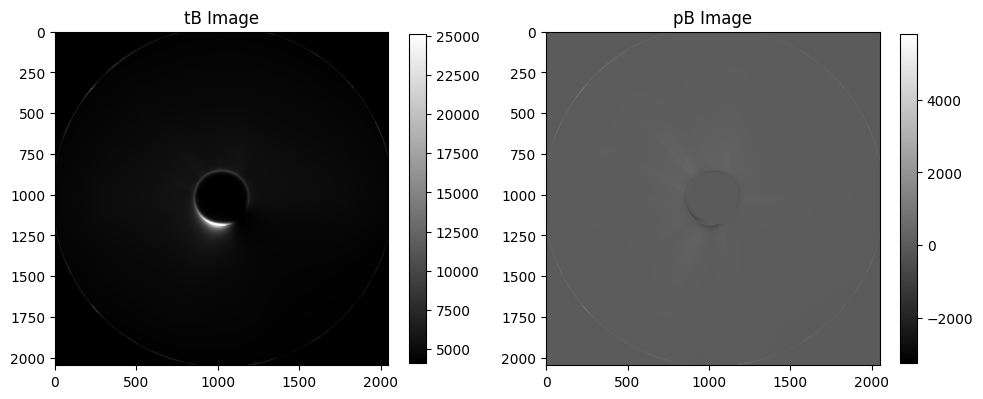

In [24]:
# display test data
pl.show_two_fits_image(tB_FITS, pB_FITS, title1="tB Image", title2="pB Image")

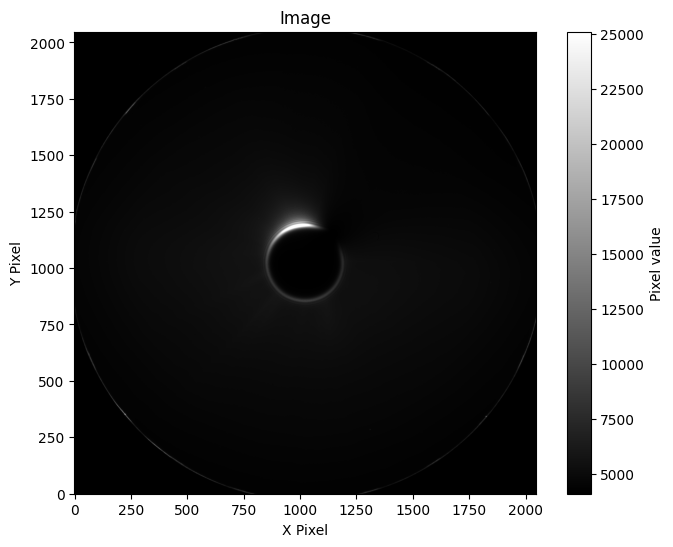

In [25]:
# this can also be done in two steps
test_data=sp.open_fits(tB_FITS)
pl.display_img(test_data)

In [26]:
tB_data, pB_data, tB_header, pB_header=sp.import_data(FITS_file_list)

C:\Users\Matthew.West\AppData\Local\Temp\ipykernel_24684\1895730730.py:1: RuntimeWarning: 'use_cdelt' is currently not implemented and is ignored.
  tB_data, pB_data, tB_header, pB_header=sp.import_data(FITS_file_list)


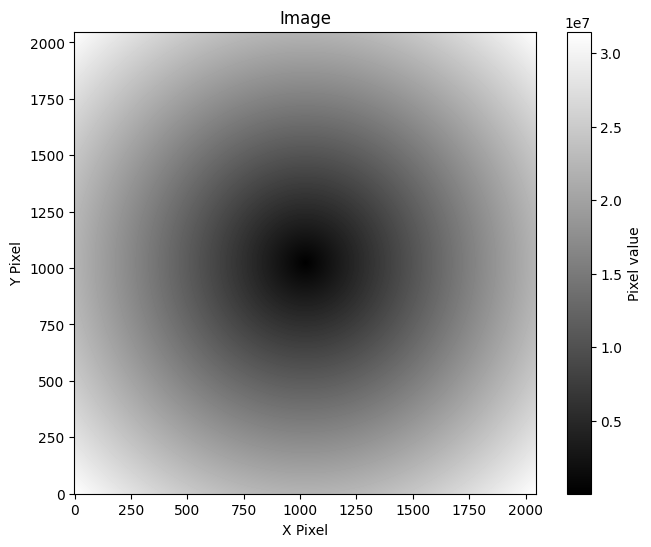

In [27]:
#create a distance array
distance_map=sp.create_distance_map(FITS_file_list)
pl.display_img(distance_map)

array: min = 1.23657e+07, max = 1.77042e+23
array: min = 1.23657e+07, max = 1.46124e+15
r_plus (Rsun): min = 17.7745, max = 430.063


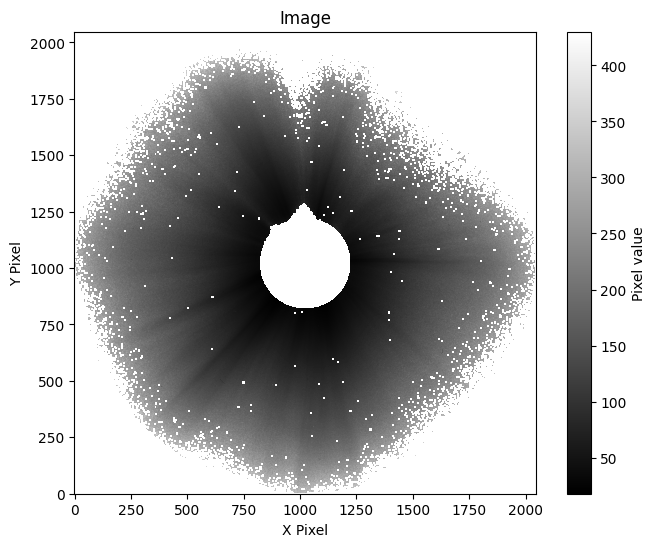

In [28]:
# create distance map
sun_obs_dist = c.au.to(u.kilometer).value      # 149597870.7 km
r_plus, r_minus, l_plus, l_minus, tau_plus, tau_minus, x_plus, x_minus=core.radial_position_ps(tB_data, pB_data, distance_map, sun_obs_dist)

sp.print_minmax(r_plus)
sp.print_minmax(r_minus)

sun_obs_dist_km = c.au.to(u.kilometer).value

r_plus_clean_km  = sp.clean_distance(r_plus,  sun_obs_dist_km, max_factor=2.0)
r_minus_clean_km = sp.clean_distance(r_minus, sun_obs_dist_km, max_factor=2.0)

r_plus_rs  = sp.to_solar_radii(r_plus_clean_km)
r_minus_rs = sp.to_solar_radii(r_minus_clean_km)

sp.print_minmax(r_plus_rs, "r_plus (Rsun)")   

pl.display_img(r_plus_rs)

Depth D: min = 0.0620628, max = 0.999998


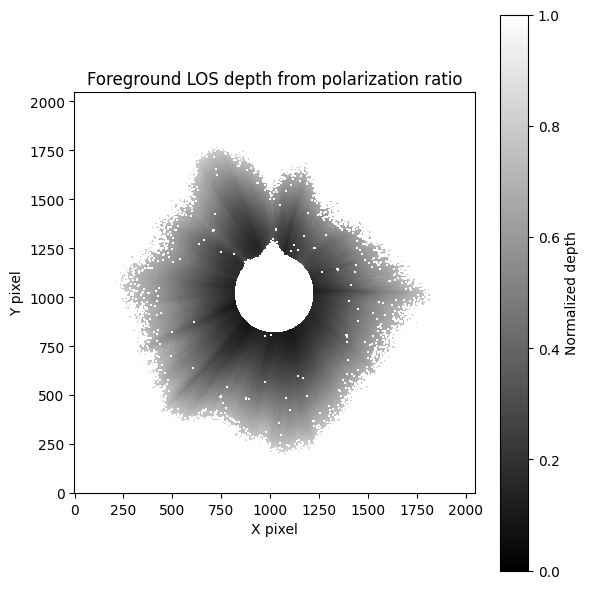

In [29]:
sun_obs_dist_km = c.au.to(u.kilometer).value

# Clean LOS distances
l_plus_clean_km = sp.clean_distance(l_plus, sun_obs_dist_km, max_factor=1.0)  # should be [0, 1 AU]

# Build depth map
D = sp.depth_map_from_los(l_plus_clean_km, sun_obs_dist_km)

# Quick stats
sp.print_minmax(D, "Depth D")

# Plot
fig, ax = pl.plot_depth_map(D, title="Foreground LOS depth from polarization ratio")

In [30]:

pl.create_triple_stereo_plot(tB_data, pB_data, distance_map, sun_obs_dist, solution='minus')


